In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [3]:
df = pd.read_csv("/content/customer_segmentation_dataset.csv")
df.head()



,CustomerID,Age,Annual_Income,Spending_Score
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40


In [5]:
X = df[['Age', 'Annual_Income', 'Spending_Score']]


In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


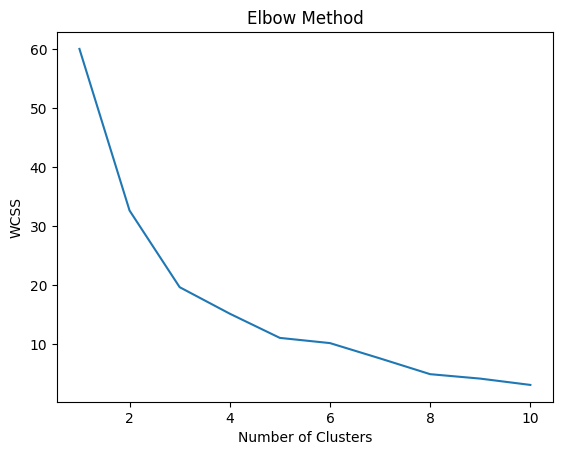

In [7]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()


In [8]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)


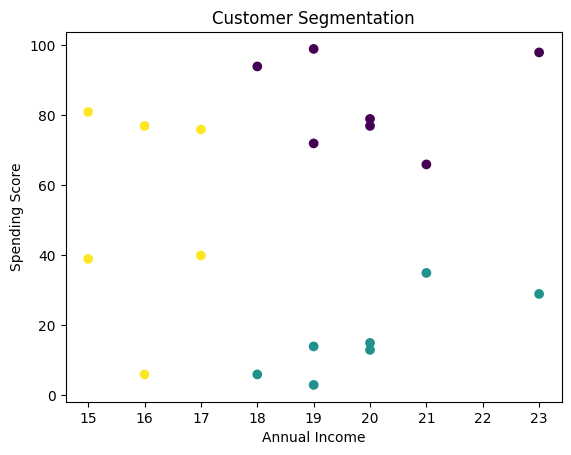

In [9]:
plt.scatter(df['Annual_Income'], df['Spending_Score'], c=df['Cluster'])
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("Customer Segmentation")
plt.show()


In [10]:
df.groupby('Cluster').mean()


,CustomerID,Age,Annual_Income,Spending_Score
Cluster,,,,
0,14.0,27.000000,20.0,83.571429
1,13.0,49.714286,20.0,16.428571
2,3.5,22.666667,16.0,53.166667
